##  Descripción:

# <span style="color:rgba(0, 0, 255, 0.8)">Descarga de datos y preparación para el análisis</span>


In [293]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [294]:
# Cargando muestra de la tabla visitas

data_visitas=pd.read_csv("/datasets/visits_log_us.csv",nrows=500)


In [295]:
data_visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 19.7+ KB


In [296]:
data_visitas.sample(10)

,Device,End Ts,Source Id,Start Ts,Uid
88,touch,2018-03-20 22:23:00,3,2018-03-20 22:12:00,14846043669385494448
335,touch,2018-03-23 09:34:00,4,2018-03-23 09:26:00,15882611572247958118
417,desktop,2017-12-29 16:26:00,1,2017-12-29 16:16:00,12096946497123941915
410,desktop,2018-02-21 07:33:00,4,2018-02-21 07:17:00,10160762237776489958
267,desktop,2017-09-18 01:31:00,10,2017-09-18 01:30:00,233175002580971273
490,desktop,2018-05-05 00:34:00,5,2018-05-05 00:34:00,7893900496339483170
409,desktop,2017-12-31 20:29:00,3,2017-12-31 20:13:00,9948627932378193650
41,touch,2017-06-30 12:39:00,3,2017-06-30 12:38:00,5743775802146959648
17,desktop,2018-05-30 08:51:00,5,2018-05-30 08:49:00,7415904268540941371
300,desktop,2018-01-30 16:07:00,3,2018-01-30 15:02:00,3886599060080125793


En la muestra hay columnas de tipo de fecha (End Ts,Start Ts) que no están en el formato correcto, además la columna Device debería ser de tipo string o categorico.
A continuación se cargará la data con los tipos de datos correctos.

In [297]:
# Cargando  la tabla visitas
data_visitas=pd.read_csv("/datasets/visits_log_us.csv",dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'])

In [298]:
data_visitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [299]:
data_visitas["Device"].unique()

['touch', 'desktop']
Categories (2, object): ['touch', 'desktop']

In [300]:
# Cargando muestra de la tabla ordenes
data_ordenes=pd.read_csv("/datasets/orders_log_us.csv",nrows=500)


In [301]:
data_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 11.8+ KB


In [302]:
data_ordenes.sample(10)

,Buy Ts,Revenue,Uid
449,2017-06-05 18:43:00,8.55,1389884115428195884
51,2017-06-01 19:22:00,3.48,1445776368244927621
99,2017-06-02 00:55:00,1.22,12044090133793755196
60,2017-06-01 20:25:00,2.44,8505275122433195603
84,2017-06-01 22:05:00,9.78,8040175152097812665
356,2017-06-05 09:46:00,2.44,11859028149883916307
75,2017-06-01 21:45:00,0.24,11726070853000284272
309,2017-06-04 16:05:00,2.81,11942638596221116814
26,2017-06-01 14:20:00,1.47,4899721912549460321
28,2017-06-01 14:26:00,1.34,1306739390297736782


La columna Buy Ts, no está en el formato correcto.

In [303]:
# Cargando  la tabla ordenes
data_ordenes=pd.read_csv("/datasets/orders_log_us.csv",parse_dates=['Buy Ts'])

In [304]:
data_ordenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [305]:
# Cargando muestra de la tabla costos
data_costos=pd.read_csv("/datasets/costs_us.csv",nrows=500)


In [306]:
data_costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.8+ KB


In [307]:
data_costos.sample(5)

,source_id,dt,costs
416,2,2017-07-24,62.56
33,1,2017-07-04,37.63
397,2,2017-07-05,58.95
197,1,2017-12-15,89.68
218,1,2018-01-05,77.45


In [308]:
# Cargando  la tabla ordenes
data_costos=pd.read_csv("/datasets/costs_us.csv",parse_dates=['dt'])

In [309]:
data_costos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Otra observación encontrada es que en la tabla de visitas y tabla ordenes, los nombres de las columnas contienen espacios y mayúsculas,se corregirá esta observación para mejorar legibilidad, la consistencia y la accesibilidad de los datos,

In [310]:
# función para cambio de nombres
def change_names(columnas_name):
    new_col_names=[]
    for old_name in columnas_name:
        name_stripped = old_name.strip()
        name_lowered = name_stripped.lower()
        name_no_spaces = name_lowered.replace(" ","_")
        new_col_names.append(name_no_spaces)
    return new_col_names

In [311]:
data_visitas.columns=change_names(data_visitas.columns)
data_ordenes.columns=change_names(data_ordenes.columns)

In [312]:
data_visitas.head(1)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062


In [313]:
data_ordenes.head(1)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.0,10329302124590727494


No se encontraron valores nulos en las tablas, se verifica duplicados:

In [314]:
data_visitas.duplicated().sum()

0

In [315]:
data_ordenes.duplicated().sum()

0

No hay filas duplicados.


# <span style="color:rgba(0, 0, 255, 0.8)">Informes y  métricas </span>

## Visitas:

### ¿Cuántas personas lo usan cada día, semana y mes?

In [316]:
data_visitas.head(5)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [317]:
data_visitas["session_year"] = data_visitas["start_ts"].dt.year 
data_visitas["session_month"] =data_visitas["start_ts"].dt.month
data_visitas['session_week']=data_visitas["start_ts"].dt.isocalendar().week
data_visitas["session_date"] = data_visitas["start_ts"].dt.date

In [318]:
usuarios_por_mes = data_visitas.groupby(["session_year",'session_month'])["uid"].nunique().reset_index()
display(usuarios_por_mes)

,session_year,session_month,uid
0,2017,6,13259
1,2017,7,14183
2,2017,8,11631
3,2017,9,18975
4,2017,10,29692
5,2017,11,32797
6,2017,12,31557
7,2018,1,28716
8,2018,2,28749
9,2018,3,27473


In [319]:
mean_users =usuarios_por_mes["uid"].mean()
print(mean_users)

23228.416666666668


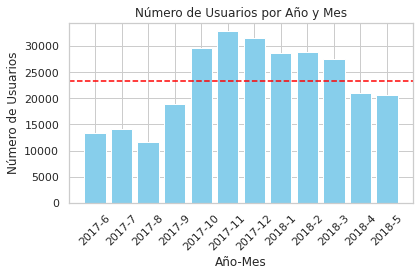

In [320]:
# Crea el gráfico de barras
plt.bar(usuarios_por_mes['session_year'].astype(str) + '-' + usuarios_por_mes["session_month"].astype(str), usuarios_por_mes['uid'], color='skyblue')
# Etiquetas de los ejes y título
plt.xlabel('Año-Mes')
plt.ylabel('Número de Usuarios')
plt.title('Número de Usuarios por Año y Mes')
# Agrega una línea para el promedio de usuarios
plt.axhline(mean_users, color='red', linestyle='--', label='Promedio de Usuarios')
# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En promedio 23228 personas usan la aplicación mensualmente.
Los meses de mayor demanda fueron los ùltimos 3 meses del 2017.

In [321]:
usuarios_por_semana =data_visitas.groupby(['session_year',"session_month","session_week"])["uid"].nunique().reset_index()
display(usuarios_por_semana)

,session_year,session_month,session_week,uid
0,2017,6,22,2021
1,2017,6,23,4129
2,2017,6,24,2812
3,2017,6,25,2878
4,2017,6,26,2435
...,...,...,...,...
57,2018,5,18,3462
58,2018,5,19,4128
59,2018,5,20,5070
60,2018,5,21,4995


In [322]:
mean_users_w=usuarios_por_semana["uid"].mean()
print(mean_users_w)

4911.129032258064


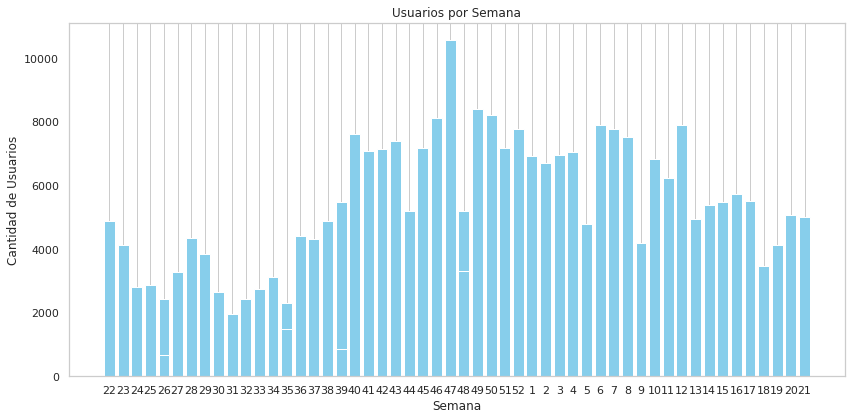

In [323]:
# Convertir las columnas de año, mes y semana a una cadena para ordenar correctamente
usuarios_por_semana['session_year'] = usuarios_por_semana['session_year'].astype(str)
usuarios_por_semana['session_month'] = usuarios_por_semana['session_month'].astype(str)
usuarios_por_semana['session_week'] = usuarios_por_semana['session_week'].astype(str)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar( usuarios_por_semana['session_week'], usuarios_por_semana['uid'],color='skyblue')

# Etiquetas de los ejes y título
plt.xlabel('Semana')
plt.ylabel('Cantidad de Usuarios')
plt.title('Usuarios por Semana')

# Mostrar el gráfico
plt.grid(axis='y')
plt.tight_layout()
plt.show()

En promedio 4911 personas usan la aplicación semanalmente.

In [324]:
usuarios_por_dia=data_visitas.groupby(['session_year',"session_month","session_week","session_date"])["uid"].nunique().reset_index()
display(usuarios_por_dia)

,session_year,session_month,session_week,session_date,uid
0,2017,6,22,2017-06-01,605
1,2017,6,22,2017-06-02,608
2,2017,6,22,2017-06-03,445
3,2017,6,22,2017-06-04,476
4,2017,6,23,2017-06-05,820
...,...,...,...,...,...
359,2018,5,21,2018-05-27,620
360,2018,5,22,2018-05-28,1039
361,2018,5,22,2018-05-29,948
362,2018,5,22,2018-05-30,1289


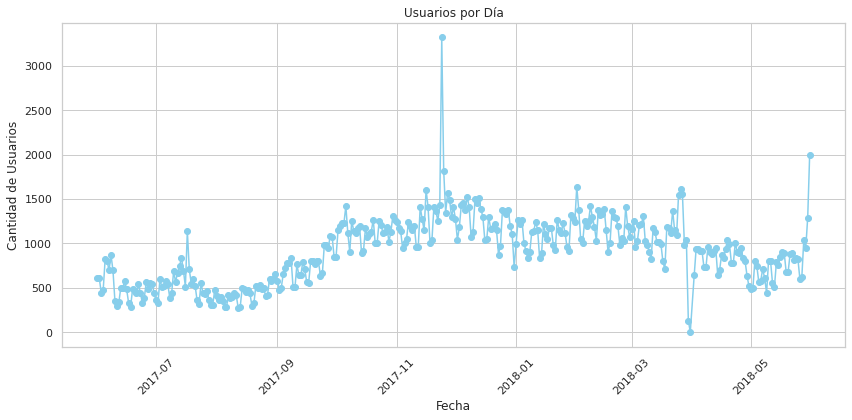

In [325]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(usuarios_por_dia['session_date'], usuarios_por_dia['uid'], marker='o', linestyle='-',color='skyblue')

# Etiquetas de los ejes y título
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios')
plt.title('Usuarios por Día')

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [326]:
mean_users_d=usuarios_por_dia["uid"].mean()
print(mean_users_d)

907.9917582417582


En promedio 907 personas usan la aplicación diariamente.

### ¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión)

In [327]:
sesiones_por_dia=data_visitas.groupby(['session_year',"session_month","session_week","session_date"])["uid"].count().reset_index()
display(sesiones_por_dia)# agrupando sesiones por día

,session_year,session_month,session_week,session_date,uid
0,2017,6,22,2017-06-01,664
1,2017,6,22,2017-06-02,658
2,2017,6,22,2017-06-03,477
3,2017,6,22,2017-06-04,510
4,2017,6,23,2017-06-05,893
...,...,...,...,...,...
359,2018,5,21,2018-05-27,672
360,2018,5,22,2018-05-28,1156
361,2018,5,22,2018-05-29,1035
362,2018,5,22,2018-05-30,1410


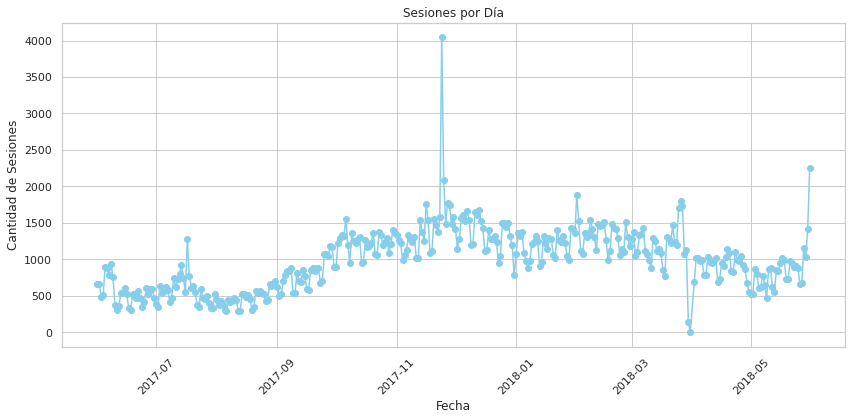

In [328]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(sesiones_por_dia['session_date'], sesiones_por_dia['uid'], marker='o', linestyle='-',color='skyblue')

# Etiquetas de los ejes y título
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Sesiones')
plt.title('Sesiones por Día')

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [329]:
sesiones_por_dia["uid"].mean()

987.3626373626373

Por día hay un promedio de 987 sesiones.

### ¿Cuál es la duración de cada sesión? La duración media de la sesión ASL

In [330]:
data_visitas["session_duration_sec"]= (data_visitas["end_ts"]- data_visitas["start_ts"]).dt.seconds 

In [331]:
display(data_visitas["session_duration_sec"])

0         1080
1         1680
2            0
3         1440
4            0
          ... 
359395      19
359396      19
359397      19
359398      19
359399      19
Name: session_duration_sec, Length: 359400, dtype: int64

In [332]:
print(data_visitas['session_duration_sec'].mean())

643.506488592098


(0.0, 20000.0)

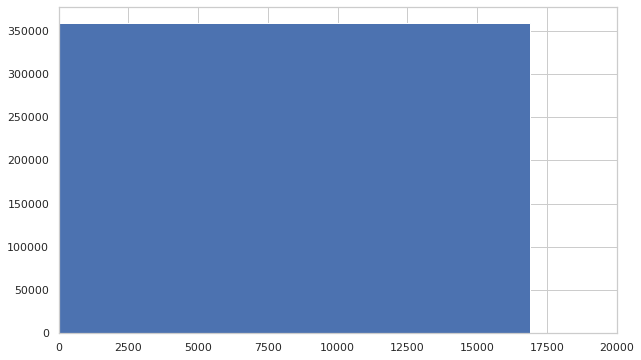

In [333]:
plt.figure(figsize=(10, 6))
data_visitas['session_duration_sec'].hist(bins=5)
plt.xlim(0, 20000)

In [334]:
print(data_visitas['session_duration_sec'].mode())

0    60
dtype: int64


Ya que la distribución no es normal, se considera la moda.
La duración de cada sesión es de 60 seg

### ¿Con qué frecuencia los usuarios y las usuarias regresan ? sticky factor (factor de adherencia)

sticky factor = DAU/WAU o sticky factor = DAU/MAU

In [335]:
sticky_factor = mean_users_d / mean_users_w #DAU/WAU
print(sticky_factor)

0.1848845249794378


In [336]:
sticky_factor = mean_users_d / mean_users #DAU/MAU
print(sticky_factor)

0.03908969652437603


Resulta una proporción menor a 1 en ambos caso, esto indica una menor retención y variabilidad en los patrones de uso entre días y semanas, y días y mes

## Ventas:

### ¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).


En este caso calcularemos cuantos días pasa desde el primer inicio de sesión hasta la primera compra del cliente, y los cohortes serán que anuncio fue el que influyó en la compra.

In [337]:
#Vamos a agrupar los datos por la columna 'uid' utilizando el método groupby().
first_session= data_visitas.groupby('uid')[ 'start_ts' ].min()

#cambiaremos el nombre del objeto Series
first_session.name = 'first_session_date' 

In [338]:
#Vamos a agrupar los datos por la columna 'uid' utilizando el método groupby().
first_buy = data_ordenes.groupby('uid')[ 'buy_ts' ].min().reset_index()

#cambiaremos el nombre del objeto Series
first_buy.name = 'first_buy_date' 

#Utilizando el método join(), uniremos el DataFrame  con la Series 
data_conversion = first_buy.join(first_session,on="uid")

print(data_conversion.head(10))

                uid              buy_ts  first_session_date
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00
5  3077748354309989 2018-03-03 12:33:00 2018-03-03 12:08:00
6  3605148382144603 2017-09-21 20:56:00 2017-08-15 21:54:00
7  3753586865891862 2018-03-03 13:50:00 2018-03-03 13:47:00
8  4808417689019433 2018-01-09 23:32:00 2018-01-09 23:10:00
9  4992223027560440 2018-04-04 13:54:00 2018-04-04 13:54:00


In [339]:
data_conversion["conversion"]=(data_conversion["buy_ts"] - data_conversion["first_session_date"]).dt.days
data_conversion=data_conversion.sort_values(by="buy_ts")
print(data_conversion)

                        uid              buy_ts  first_session_date  \
20437  10329302124590727494 2017-06-01 00:10:00 2017-06-01 00:09:00   
23018  11627257723692907447 2017-06-01 00:25:00 2017-06-01 00:14:00   
35477  17903680561304213844 2017-06-01 00:27:00 2017-06-01 00:25:00   
31908  16109239769442553005 2017-06-01 00:29:00 2017-06-01 00:14:00   
28100  14200605875248379450 2017-06-01 07:58:00 2017-06-01 07:31:00   
...                     ...                 ...                 ...   
24312  12296626599487328624 2018-05-31 23:50:00 2018-05-31 09:11:00   
22509  11369640365507475976 2018-05-31 23:50:00 2018-05-31 23:05:00   
3534    1786462140797698849 2018-05-31 23:54:00 2018-05-31 23:52:00   
7919    3993697860786194247 2018-05-31 23:56:00 2017-10-23 12:32:00   
168       83872787173869366 2018-06-01 00:02:00 2018-05-31 23:59:00   

       conversion  
20437           0  
23018           0  
35477           0  
31908           0  
28100           0  
...           ...  
24312  

<AxesSubplot:>

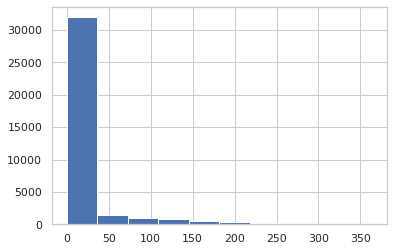

In [340]:
data_conversion["conversion"].hist()

In [341]:
print(data_conversion["conversion"].mean())


16.7298688497659


In [342]:
print(data_conversion["conversion"].mode())

0    0
dtype: int64


Hay una cantidad representativa que tardan 0 dìas para realizar la primera compra.

In [343]:
data_source=data_visitas.groupby("uid")["source_id"].nunique().reset_index()#agrupando por usuario y cantidad de fuentes de anuncio

In [344]:
print(data_source) 
data_source["source_id"].max() # cantidad de source_id relacionados a uid

                         uid  source_id
0             11863502262781          1
1             49537067089222          1
2            297729379853735          1
3            313578113262317          1
4            325320750514679          1
...                      ...        ...
228164  18446403737806311543          1
228165  18446424184725333426          1
228166  18446556406699109058          1
228167  18446621818809592527          1
228168  18446676030785672386          1

[228169 rows x 2 columns]


7

Se Observa que hay en algunos casos varios source_id para un solo uid, para este primer análisis se considera el primer anuncio que se vió.

In [345]:
merged_data = data_conversion.merge(data_visitas.drop_duplicates(subset=['uid']), on='uid', how='left')
merged_data.groupby("source_id")["conversion"].mean()

source_id
1     14.505477
2     21.683090
3     16.053403
4     16.643592
5     13.182190
7      0.000000
9     32.168198
10    13.809831
Name: conversion, dtype: float64

Según lo observado la fuente de anuncios más efectiva es la número 7, ya que tardan en promedio 0 dìas para realizar la primera compra luego del primer inicio de sesión. Sin embargo no se está tomando en cuenta la cantidad de usuarios que realizan la compra.
Ahora se considerará los source_id visto antes de la compra.

In [346]:
#Agrupando y calculando cuantos días pasan hasta la primera compra desde cada sesión de usuario.

merged_data1 =data_visitas[["source_id","start_ts","uid"]].merge(data_conversion.drop_duplicates(subset=['uid']), on='uid', how='left')

In [347]:
# Crear DataFrame con la información de sesiones antes de la primera compra
merged_data1 = merged_data1.dropna(subset=['buy_ts'])

# Filtrar sesiones antes de la compra y calcular días hasta la compra
sesiones_antes_compra = merged_data1[merged_data1['start_ts'] < merged_data1['buy_ts']]
sesiones_antes_compra['dias_hasta_compra'] = (sesiones_antes_compra['buy_ts'] - sesiones_antes_compra['start_ts']).dt.days
sesiones_antes_compra['dia_compra']=merged_data1['buy_ts']
#  Calcular el número de sesión por usuario

#primero ordenamos el datframe

sesiones_antes_compra = sesiones_antes_compra.sort_values(by=['uid', 'start_ts'])

sesiones_antes_compra["n_sesion"] = sesiones_antes_compra.groupby('uid').cumcount() + 1

#  Crear matriz utilizando pivot_table
mtriz_cohortes = sesiones_antes_compra.pivot_table(index='source_id', columns="n_sesion", values="dias_hasta_compra", aggfunc='mean')

# Imprimir la matriz
display(mtriz_cohortes)

/tmp/ipykernel_28/4152791690.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sesiones_antes_compra['dias_hasta_compra'] = (sesiones_antes_compra['buy_ts'] - sesiones_antes_compra['start_ts']).dt.days
/tmp/ipykernel_28/4152791690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sesiones_antes_compra['dia_compra']=merged_data1['buy_ts']


n_sesion,1,2,3,4,5,6,7,8,9,10,...,146,147,148,149,150,151,152,153,154,155
source_id,,,,,,,,,,,,,,,,,,,,,
1,11.715473,12.667023,16.269231,22.052219,31.769953,27.690141,30.683673,38.011905,50.600000,47.682927,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22.339458,24.714748,28.220028,32.284457,30.785714,43.022388,40.161017,40.031579,39.500000,41.692308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.376965,19.683241,25.886414,27.562162,40.348837,32.840580,31.000000,49.478261,43.411765,92.428571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.157362,19.125717,22.911924,26.948276,26.921348,32.263158,34.000000,44.136364,34.756757,39.750000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15.080638,12.139635,17.323636,22.938776,31.000000,39.152542,44.818182,19.428571,33.357143,23.083333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,46.087870,38.571429,39.724138,54.402299,40.723404,40.178571,27.666667,8.888889,12.500000,29.142857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,12.647865,16.340909,27.560976,35.066667,33.888889,34.222222,83.250000,45.200000,46.166667,57.250000,...,78.0,78.0,78.0,78.0,77.0,77.0,77.0,77.0,76.0,76.0


En la matriz se observa que hay usuarios que han tenido  hasta 155 sesiones antes de realizar su primera compra,
Todos los usuarios que vieron en su primera sesión el anuncio 7, compró el mismo día.


Se visualiza solo la ultima sesión antes de la compra 

In [348]:

ultima_sesion_por_usuario = sesiones_antes_compra.groupby('uid').agg({'n_sesion': 'max', 
                                                                   'dias_hasta_compra': 'last', 
                                                                   'source_id': 'last', 
                                                                   'dia_compra': 'last'}).reset_index()
ultima_sesion_por_usuario["month"]=ultima_sesion_por_usuario["dia_compra"].dt.month
mtriz_cohortes=ultima_sesion_por_usuario.groupby("source_id")["dias_hasta_compra"].mean()  # agrupando por source_id
print(mtriz_cohortes)

source_id
1      2.323812
2      5.702030
3      6.052607
4      5.971624
5      5.179410
7      0.000000
9     14.425365
10     4.793597
Name: dias_hasta_compra, dtype: float64


Los usuarios que vieron el anuncio 1 antes de su primera compra, lo realizo en 1.91 días en promedio.

### ¿Cuántos pedidos hacen durante un período de tiempo dado?


In [349]:
# agrupando tabla ordenes por mes y usuarios 
data_ordenes["year"]=data_ordenes[ 'buy_ts' ].dt.year
data_ordenes["month"]=data_ordenes[ 'buy_ts' ].dt.month
data_ordenes.groupby(["year","month",'uid'])[ 'buy_ts' ].count().reset_index()["buy_ts"].mean() # calculando número de ordenes por usuario al mes


1.2290645798288597

En promedio un usuario realiza 1.22 pedidos al mes.

¿Cuál es el tamaño promedio de compra?


In [350]:
data_ordenes["revenue"].mean() # promedio de valor de cada orden

4.999646930477041

¿Cuánto dinero traen? (LTV)

Se realiza un análisis inicial considerando cohortes agrupados por el primer mes de compra

In [351]:
#mes de la primera compra de cada cliente:

first_orders = data_ordenes.groupby('uid').agg({'month': 'min'}).reset_index() 
first_orders.columns = ['uid', 'first_order_month'] 


#número de nuevos clientes (n_buyers) para cada mes:


cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index() 
cohort_sizes.columns = ['first_order_month', 'n_buyers'] 
cohort_sizes.head()


#cohortes:

data_ordenes= pd.merge(data_ordenes,first_orders, on='uid') 

#agrupar la tabla de pedidos por mes de la primera compra y mes de la compra y totalizar los ingresos.

cohorts = data_ordenes.groupby(['first_order_month','month']).agg({'revenue': 'sum'}).reset_index() 

report = pd.merge(cohort_sizes, cohorts, on='first_order_month') 
print(report.sample(5))


    first_order_month  n_buyers  month  revenue
31                  3      3856     11   794.34
28                  3      3856      8   195.99
32                  3      3856     12   557.87
7                   1      3898      8   907.50
4                   1      3898      5  2676.91


In [352]:
margin_rate = 1 #considerando un margen de 1
report['gp'] = report['revenue'] * margin_rate 
report['age'] = ( report['month']-report['first_order_month'] )
report['age'] = report['age'].round().astype('int') 

report['ltv'] = report['gp'] / report['n_buyers'] 

output = report.pivot_table( index='first_order_month', columns='age', values='ltv', aggfunc='mean' ).round() 
output_acu= output.cumsum(axis=1).round(2)
output_acu.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
1,5.0,7.0,9.0,10.0,11.0,11.0,11.0,11.0,12.0,13.0,14.0,18.0
2,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,,
4,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,,,
5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,,,,
6,5.0,5.0,5.0,5.0,5.0,5.0,5.0,,,,,
7,6.0,6.0,6.0,6.0,6.0,6.0,,,,,,
8,5.0,5.0,5.0,5.0,5.0,,,,,,,
9,5.0,6.0,6.0,6.0,,,,,,,,


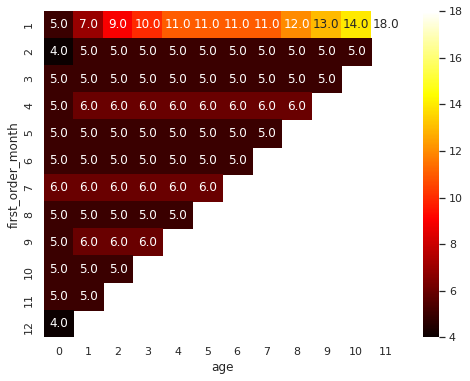

In [353]:

plt.figure(figsize=(8, 6))
sns.heatmap(output_acu, cmap='hot', annot=True, fmt=".1f")
plt.show()

Se observa en el heatmap que en el primer cohorte se da un aumento del ltv en el transcurso de los meses.

In [354]:
output['total']= output.iloc[:, 0:].sum(axis=1)
print( output["total"])


first_order_month
1     18.0
2      5.0
3      5.0
4      6.0
5      5.0
6      5.0
7      6.0
8      5.0
9      6.0
10     5.0
11     5.0
12     4.0
Name: total, dtype: float64


In [355]:
output['total'].mean()

6.25

En promedio un cliente de cada cohorte genera un ingreso de 6.25 soles por usuario. Además los clientes en la mayoria de casos no vuelven a realizar más compras en los siguientes meses.

Se analizará teniendo en cuenta las fuentes de anuncios: Se asocia cada venta al último anuncio visto antes de la primera compra.


In [356]:

data_orde_source= pd.merge(data_ordenes, ultima_sesion_por_usuario, on=["uid"])


In [357]:
data_orde_source=data_orde_source.groupby("source_id").agg({'uid': 'nunique', 
                                                                   'revenue': 'sum', 
                                                    })

In [358]:
margin_rate = 1 #considerando un margen de 1
data_orde_source['gp'] = data_orde_source['revenue'] * margin_rate
data_orde_source['ltv'] = data_orde_source['gp'] / data_orde_source['uid'] 

In [359]:
print(data_orde_source)

            uid   revenue        gp        ltv
source_id                                     
1          3956  35154.70  35154.70   8.886426
2          3695  51096.87  51096.87  13.828652
3          8535  41463.66  41463.66   4.858074
4          9198  49777.39  49777.39   5.411762
5          6605  49222.28  49222.28   7.452276
7             1      1.22      1.22   1.220000
9           891   4367.02   4367.02   4.901257
10         1187   4215.01   4215.01   3.550977


La fuente que generó mayor ingresopor usuario fue la fuente 2, la fuente que genera menos ingreso es la fuente 7 a pesar que el tiempo de respuesta era de 0 días, y es porque solo fue 1 usuario.

Siendo la fuente 4 y 5 las que atrajeron más usuarios.

## Marketing:

### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo

Se agrupa por source_id y mes para ver el compartmiento de los costos en los meses

In [360]:
data_costos["year-month"] = data_costos["dt"].dt.strftime("%Y-%m")
data_costos["year"]=data_costos["dt"].dt.year
data_costos["month"]=data_costos["dt"].dt.month
costos_tot=data_costos.pivot_table(index="source_id",columns=["year","month","year-month"],values="costs",aggfunc="sum")
print(costos_tot)

year           2017                                                           \
month            6        7        8        9         10        11        12   
year-month  2017-06  2017-07  2017-08  2017-09   2017-10   2017-11   2017-12   
source_id                                                                      
1           1125.61  1072.88   951.81  1502.01   2315.75   2445.16   2341.20   
2           2427.38  2333.11  1811.05  2985.66   4845.00   5247.68   4897.80   
3           7731.65  7674.37  6143.54  9963.55  15737.24  17025.34  16219.52   
4           3514.80  3529.73  3217.36  5192.26   6420.84   5388.82   7680.47   
5           2616.12  2998.14  2185.28  3849.14   5767.40   6325.34   5872.52   
9            285.22   302.54   248.93   415.62    609.41    683.18    657.98   
10           314.22   329.82   232.57   460.67    627.24    792.36    645.86   

year            2018                                        
month             1         2         3        4        5 

No se registra costos de las fuentes 6, 7 y 8.

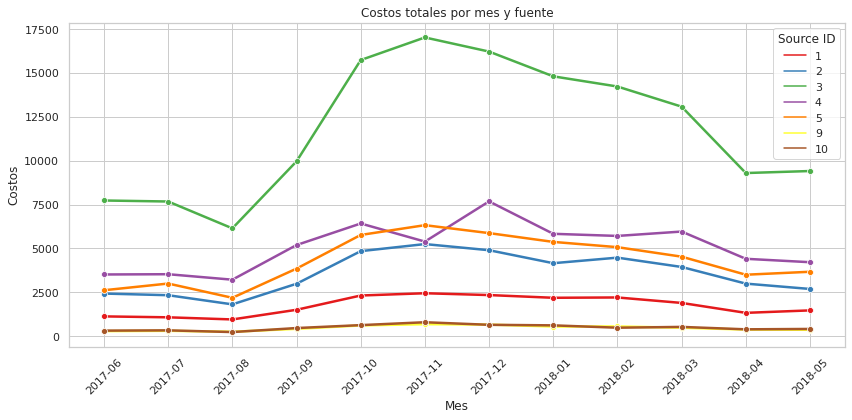

In [361]:
palette = sns.color_palette("Set1", len(costos_tot.index))


# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=costos_tot.T.stack().reset_index(), x="year-month", y=0, hue="source_id", marker='o',palette=palette, linewidth=2.5)

# Añadir título y etiquetas
plt.title("Costos totales por mes y fuente")
plt.xlabel("Mes")
plt.ylabel("Costos")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.legend(title='Source ID', loc='upper right')
plt.tight_layout()
plt.show()

Los costos de la fuente de anuncio 3 fueron los mayores a lo largo de los meses, llegando a su punto más alto en noviembre del 2017.

### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [362]:
#Se agrupa por mes y source id,resumiendo costos por fuente.

costos_mes_source=data_costos.groupby(["year","month","source_id"])["costs"].sum().reset_index()
print(costos_mes_source)

    year  month  source_id    costs
0   2017      6          1  1125.61
1   2017      6          2  2427.38
2   2017      6          3  7731.65
3   2017      6          4  3514.80
4   2017      6          5  2616.12
..   ...    ...        ...      ...
79  2018      5          3  9411.42
80  2018      5          4  4214.21
81  2018      5          5  3669.56
82  2018      5          9   362.17
83  2018      5         10   409.86

[84 rows x 4 columns]


In [363]:
nbuyer_source= ultima_sesion_por_usuario.groupby(["source_id","month"])["uid"].nunique().reset_index() 
# se considera los usuarios que realizaron su primera compra en el mes


In [364]:
report_ = pd.merge(costos_mes_source, nbuyer_source, on=['month',"source_id"])

report_['cac'] = report_['costs'] / report_['uid'] # calculando el costo por usuario y canal en cada mes
report_.head(10)

,year,month,source_id,costs,uid,cac
0,2017,6,1,1125.61,209,5.385694
1,2017,6,2,2427.38,210,11.558952
2,2017,6,3,7731.65,561,13.781907
3,2017,6,4,3514.80,353,9.956941
4,2017,6,5,2616.12,353,7.411105
5,2017,6,9,285.22,52,5.485000
6,2017,6,10,314.22,86,3.653721
7,2017,7,1,1072.88,221,4.854661
8,2017,7,2,2333.11,215,10.851674
9,2017,7,3,7674.37,400,19.185925


In [365]:
data_costo_source=report_.groupby("source_id")["cac"].mean() # promediando valores de cac por source_id
print(data_costo_source)

source_id
1      5.377754
2     11.864314
3     16.928051
4      7.233582
5      7.836777
9      6.927168
10     5.380649
Name: cac, dtype: float64


In [276]:
report_['cac'].mean()

8.792613518991645

Los costos por adquisición de un cliente es alrededor 8.79.
Siendo la fuente más elevada la 3, y la menos costosa la 10.
Se da entender que no hay costos generados por las fuentes 6,7,8 sin embargo la fuente 7 fue una fuente efectiva ya que generaba compras en el mismo día.

¿Cuán rentables eran las inversiones? (ROMI)

In [366]:
data_ordenes

,buy_ts,revenue,uid,year,month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,6
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018,5,5
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018,5,5
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018,5,5
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018,5,5


In [367]:
data_orde_source

,uid,revenue,gp,ltv
source_id,,,,
1,3956,35154.70,35154.70,8.886426
2,3695,51096.87,51096.87,13.828652
3,8535,41463.66,41463.66,4.858074
4,9198,49777.39,49777.39,5.411762
5,6605,49222.28,49222.28,7.452276
7,1,1.22,1.22,1.220000
9,891,4367.02,4367.02,4.901257
10,1187,4215.01,4215.01,3.550977


In [368]:
data_costo_source.reset_index()

,source_id,cac
0,1,5.377754
1,2,11.864314
2,3,16.928051
3,4,7.233582
4,5,7.836777
5,9,6.927168
6,10,5.380649


In [369]:
# Romi por fuente
data_romi=pd.merge(data_costo_source,data_orde_source,on="source_id",how="outer")


In [370]:
print(data_romi)

                 cac   uid   revenue        gp        ltv
source_id                                                
1           5.377754  3956  35154.70  35154.70   8.886426
2          11.864314  3695  51096.87  51096.87  13.828652
3          16.928051  8535  41463.66  41463.66   4.858074
4           7.233582  9198  49777.39  49777.39   5.411762
5           7.836777  6605  49222.28  49222.28   7.452276
9           6.927168   891   4367.02   4367.02   4.901257
10          5.380649  1187   4215.01   4215.01   3.550977
7                NaN     1      1.22      1.22   1.220000


In [371]:
data_romi['romi'] = data_romi['ltv'] / data_romi['cac'] 

In [372]:
display(data_romi)


,cac,uid,revenue,gp,ltv,romi
source_id,,,,,,
1,5.377754,3956,35154.70,35154.70,8.886426,1.652442
2,11.864314,3695,51096.87,51096.87,13.828652,1.165567
3,16.928051,8535,41463.66,41463.66,4.858074,0.286984
4,7.233582,9198,49777.39,49777.39,5.411762,0.748144
5,7.836777,6605,49222.28,49222.28,7.452276,0.950936
9,6.927168,891,4367.02,4367.02,4.901257,0.707541
10,5.380649,1187,4215.01,4215.01,3.550977,0.659953
7,NaN,1,1.22,1.22,1.220000,NaN


### ROMI promedio sobre el ciclo de vida de cada cohorte

In [373]:
# calcular los costos por mes 
monthly_costs = data_costos.groupby('month').sum() 
monthly_costs.head()


,source_id,costs,year
month,,,
1,1054,33518.52,437906
2,952,32723.03,395528
3,1025,30415.27,425798
4,986,22289.38,409654
5,1054,22224.27,437906


In [374]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month') 
report_['cac'] = report_['costs'] / report_['n_buyers'] 
report_.head()


,first_order_month,n_buyers,month,revenue,gp,age,ltv,source_id,costs,year,cac
0,1,3898,1,19417.13,19417.13,0,4.981306,1054,33518.52,437906,8.598902
1,1,3898,2,8275.63,8275.63,1,2.123045,1054,33518.52,437906,8.598902
2,1,3898,3,7970.76,7970.76,2,2.044833,1054,33518.52,437906,8.598902
3,1,3898,4,3697.85,3697.85,3,0.948653,1054,33518.52,437906,8.598902
4,1,3898,5,2676.91,2676.91,4,0.686739,1054,33518.52,437906,8.598902


In [375]:
#Y ahora busquemos el ROMI,dividiendo el LTV por el CAC.
report_['romi'] = report_['ltv'] / report_['cac'] 
output = report_.pivot_table( index='first_order_month', columns='age', values='romi', aggfunc='mean' )
romi=output.cumsum(axis=1).round(2)
romi.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
1,0.58,0.83,1.06,1.17,1.25,1.27,1.3,1.32,1.44,1.56,1.68,2.13
2,0.53,0.6,0.61,0.64,0.65,0.66,0.67,0.7,0.72,0.75,0.77,
3,0.61,0.65,0.69,0.7,0.71,0.71,0.72,0.76,0.78,0.8,,
4,0.51,0.56,0.57,0.57,0.58,0.59,0.59,0.61,0.61,,,
5,0.67,0.67,0.68,0.7,0.71,0.72,0.74,0.75,,,,
6,0.47,0.48,0.5,0.51,0.53,0.54,0.55,,,,,
7,0.57,0.59,0.61,0.63,0.64,0.65,,,,,,
8,0.43,0.45,0.46,0.48,0.49,,,,,,,
9,0.49,0.53,0.55,0.57,,,,,,,,


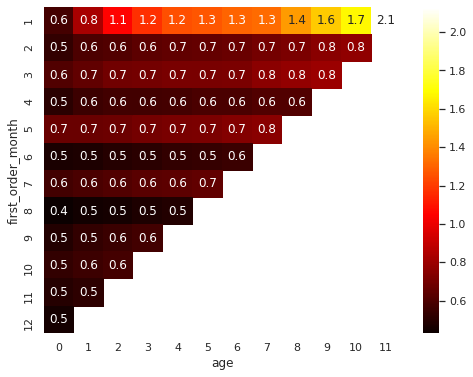

In [376]:
plt.figure(figsize=(8, 6))
sns.heatmap(romi, cmap='hot', annot=True, fmt=".1f")
plt.show()

El primer cohorte compensa a partir del 3er mes 


## <span style="color:rgba(0, 0, 255, 0.8)">Conclusión</span>

Se recomienda las fuentes con source_id 1, 2 ya que tienen un romi mayor que 1 e indica que el valor del tiempo de vida del cliente es mayor que el costo de adquisición del cliente. En términos simples, esto significa que los ingresos que se obtienen de un cliente a lo largo de su vida útil son mayores que el costo que se requiere para adquirirlo.
Además se podría aprovechar la audiencia que está teniendo las fuentes 4 y 5 y reemplazarlas por fuentes menos costosas.
Respecto a los cohortes, el primer cohorte recupera la inversión a partir del 3er mes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Felicitaciones Lucía, hemos llegado al final del proyecto y has tenido un gran desempeño a lo largo del mismo. Muy bien hecho! En relación a tu conclusión te felicito porque demuestra tu comprensión sobre el proyecto.
<div>
